- First to we need to collect images data set ( in keras it is available)

In [1]:
import numpy as np
import pandas as pd

In [2]:
import tensorflow

In [3]:
from tensorflow import keras

In [4]:
digit_mnist = keras.datasets.mnist

- Now we split the data set into X_train and y_train

In [5]:
(X_train_full,y_train_full),(X_test,y_test) = digit_mnist.load_data()

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_train_full = X_train_full.reshape(60000,28,28,1)
X_train_full

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [8]:
X_train_full.shape

(60000, 28, 28, 1)

In [9]:
X_test = X_test.reshape(10000,28,28,1)

In [10]:
X_train_set = X_train_full/255.0
X_test_set = X_test/255.0

In [11]:
X_train,X_valid = X_train_set[6000: ],X_train_set[ :6000]
y_train,y_valid = y_train_full[6000: ],y_train_full[ :6000]

In [12]:
X_test = X_test_set

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Activation
from tensorflow.keras.activations import relu,softmax

In [14]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation = 'relu',input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(200,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 200)               1081800   
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [16]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = ['acc'])

In [17]:
model.fit(X_train,y_train,epochs = 60,batch_size = 64,validation_data= (X_valid,y_valid))

Epoch 1/60
844/844 [==============================] - 15s 17ms/step - loss: 0.1771 - acc: 0.9476 - val_loss: 0.0821 - val_acc: 0.9738
Epoch 2/60
844/844 [==============================] - 16s 18ms/step - loss: 0.0533 - acc: 0.9831 - val_loss: 0.0520 - val_acc: 0.9843
Epoch 3/60
844/844 [==============================] - 16s 19ms/step - loss: 0.0322 - acc: 0.9898 - val_loss: 0.0544 - val_acc: 0.9830
Epoch 4/60
844/844 [==============================] - 16s 19ms/step - loss: 0.0216 - acc: 0.9929 - val_loss: 0.0626 - val_acc: 0.9815
Epoch 5/60
844/844 [==============================] - 16s 20ms/step - loss: 0.0170 - acc: 0.9944 - val_loss: 0.0504 - val_acc: 0.9870
Epoch 6/60
844/844 [==============================] - 16s 19ms/step - loss: 0.0115 - acc: 0.9963 - val_loss: 0.0538 - val_acc: 0.9862
Epoch 7/60
844/844 [==============================] - 16s 19ms/step - loss: 0.0108 - acc: 0.9963 - val_loss: 0.0505 - val_acc: 0.9853
Epoch 8/60
844/844 [==============================] - 18s 22ms

In [18]:
training_loss = model.history.history['loss']
training_acc = model.history.history['acc']
training_val_loss = model.history.history['val_loss']
training_val_acc= model.history.history['val_acc']

In [19]:
import matplotlib.pyplot as plt

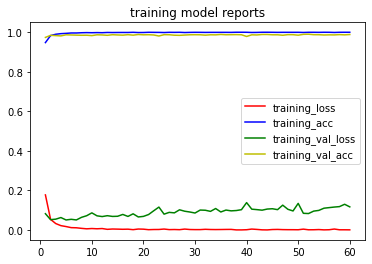

In [20]:
# Plotting graph

plt.title('training model reports')

plt.plot(np.arange(1,len(training_loss)+1),training_loss,color = 'r',label = 'training_loss')
plt.plot(np.arange(1,len(training_loss)+1),training_acc,color = 'b',label = 'training_acc')

plt.plot(np.arange(1,len(training_loss)+1),training_val_loss,color = 'g',label = 'training_val_loss')
plt.plot(np.arange(1,len(training_loss)+1),training_val_acc,color = 'y',label = 'training_val_acc')

plt.legend(loc = 0)

plt.show()

In [21]:
y_test_pred = model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [22]:
# checking accuracy

import sklearn

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
len(y_test_pred)

10000

In [26]:
y_test_pred

array([[0.0000000e+00, 1.3968456e-31, 4.1724341e-33, ..., 1.0000000e+00,
        1.0706686e-37, 1.8908245e-29],
       [2.0077241e-31, 2.0879472e-26, 1.0000000e+00, ..., 5.3083444e-32,
        4.5868245e-33, 2.7432624e-37],
       [7.2230663e-30, 1.0000000e+00, 3.0864805e-26, ..., 4.2309534e-25,
        9.5865761e-24, 7.9623817e-26],
       ...,
       [1.3786099e-37, 9.3166686e-35, 7.2897630e-34, ..., 1.2188552e-34,
        2.1480899e-24, 1.5438348e-29],
       [2.9540112e-38, 3.0709788e-33, 0.0000000e+00, ..., 1.4674600e-31,
        1.5079176e-09, 6.2908896e-25],
       [2.4842906e-25, 1.3875926e-33, 9.1226284e-38, ..., 9.4474114e-34,
        1.7102835e-30, 9.0552061e-35]], dtype=float32)

In [28]:
test_res = []
for i in y_test_pred:
    test_res.append(np.argmax(i))
test_res

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 5,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 4,
 4,
 2,


In [29]:
accuracy_score(y_test,test_res)

0.9871